In [1]:
#Import all the modules needed to complete data visualization
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem

In [2]:
#assign data file to variable

insurance_data_path = "insurance.csv"

In [3]:
# Read Data into DataFrame
insurance_df = pd.read_csv(insurance_data_path)

insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#Pull data for regional pie chart

region_counts= insurance_df['region'].value_counts()

region_counts

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

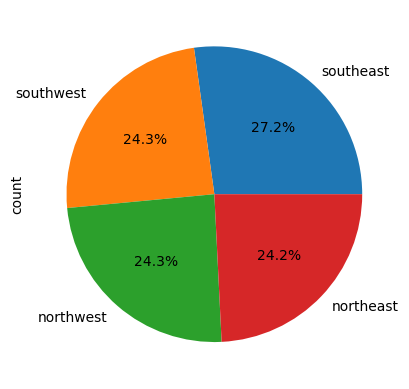

In [5]:
#Show distribution of data by region
region_counts.plot.pie(autopct= '%1.1f%%')
plt.show

In [6]:
southeast_df = insurance_df.loc[insurance_df['region']== 'southeast']
southeast_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
11,62,female,26.29,0,yes,southeast,27808.7251
...,...,...,...,...,...,...,...
1322,62,male,38.83,0,no,southeast,12981.3457
1323,42,female,40.37,2,yes,southeast,43896.3763
1327,51,male,30.03,1,no,southeast,9377.9047
1330,57,female,25.74,2,no,southeast,12629.1656


In [10]:
se_price_list = southeast_df['charges']

se_price_list

1        1725.5523
2        4449.4620
5        3756.6216
6        8240.5896
11      27808.7251
           ...    
1322    12981.3457
1323    43896.3763
1327     9377.9047
1330    12629.1656
1335     1629.8335
Name: charges, Length: 364, dtype: float64

In [7]:
southwest_df = insurance_df.loc[insurance_df['region']== 'southwest']
southwest_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92400
12,23,male,34.4,0,no,southwest,1826.84300
15,19,male,24.6,1,no,southwest,1837.23700
18,56,male,40.3,0,no,southwest,10602.38500
19,30,male,35.3,0,yes,southwest,36837.46700
...,...,...,...,...,...,...,...
1316,19,female,20.6,0,no,southwest,1731.67700
1329,52,male,38.6,2,no,southwest,10325.20600
1331,23,female,33.4,0,no,southwest,10795.93733
1332,52,female,44.7,3,no,southwest,11411.68500


In [11]:
sw_price_list = southwest_df['charges']

sw_price_list

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

In [8]:
northeast_df = insurance_df.loc[insurance_df['region']== 'northeast']
northeast_df

,age,sex,bmi,children,smoker,region,charges
8,37,male,29.830,2,no,northeast,6406.41070
10,25,male,26.220,0,no,northeast,2721.32080
16,52,female,30.780,1,no,northeast,10797.33620
17,23,male,23.845,0,no,northeast,2395.17155
20,60,female,36.005,0,no,northeast,13228.84695
...,...,...,...,...,...,...,...
1321,62,male,26.695,0,yes,northeast,28101.33305
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130
1328,23,female,24.225,2,no,northeast,22395.74424


In [12]:
ne_price_list = northeast_df['charges']

ne_price_list

8        6406.41070
10       2721.32080
16      10797.33620
17       2395.17155
20      13228.84695
           ...     
1321    28101.33305
1325    13143.33665
1326     7050.02130
1328    22395.74424
1334     2205.98080
Name: charges, Length: 324, dtype: float64

In [9]:
northwest_df = insurance_df.loc[insurance_df['region']== 'northwest']
northwest_df

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
7,37,female,27.740,3,no,northwest,7281.50560
9,60,female,25.840,0,no,northwest,28923.13692
24,37,male,28.025,2,no,northwest,6203.90175
...,...,...,...,...,...,...,...
1319,39,female,26.315,2,no,northwest,7201.70085
1320,31,male,31.065,3,no,northwest,5425.02335
1324,31,male,25.935,1,no,northwest,4239.89265
1333,50,male,30.970,3,no,northwest,10600.54830


In [13]:
nw_price_list = northwest_df['charges']

nw_price_list

3       21984.47061
4        3866.85520
7        7281.50560
9       28923.13692
24       6203.90175
           ...     
1319     7201.70085
1320     5425.02335
1324     4239.89265
1333    10600.54830
1337    29141.36030
Name: charges, Length: 325, dtype: float64